###### Case - 1: Resturant Revenue Prediction (Tab Food Investment - Kaggle Dataset)¶

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
from datetime import date

Read Files 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [3]:
train = train.drop('Id',axis = 1)
test = test.drop('Id',axis=1)

Exploratory Data Analysis 

In [4]:
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [20]:
test.head(2)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0


In [21]:
train.rename(columns={"Open Date": "OpenDate", "City Group": "CityGroup"},inplace = True)
test.rename(columns={"Open Date": "OpenDate", "City Group": "CityGroup"},inplace = True)

In [6]:
train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [7]:
print(train.describe(include = 'object'))

          OpenDate      City   CityGroup Type
count          137       137         137  137
unique         134        34           2    3
top     02/02/2012  İstanbul  Big Cities   FC
freq             2        50          78   76


In [8]:
print(train.shape)
print(test.shape)

(137, 42)
(100000, 41)


In [9]:
train.columns

Index(['OpenDate', 'City', 'CityGroup', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [10]:
print(train.describe(include = 'object'))
print(test.describe(include = 'object'))

          OpenDate      City   CityGroup Type
count          137       137         137  137
unique         134        34           2    3
top     02/02/2012  İstanbul  Big Cities   FC
freq             2        50          78   76
         Open Date      City City Group    Type
count       100000    100000     100000  100000
unique         310        57          2       4
top     07/10/2013  İstanbul      Other      FC
freq           645     34087      50728   57019


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = pd.DataFrame(train.corr())
corr.to_csv("corr2.csv",index=False)

In [12]:
#train = train.drop(['P25','P4','P19','P24','P20','P14','P15','P26','P27','P37','P3','P5','P33','P18','P16'],axis = 1)

In [13]:
#test = test.drop(['P25','P4','P19','P24','P20','P14','P15','P26','P27','P37','P3','P5','P33','P18','P16'],axis = 1)

In [14]:
#train.columns

In [29]:
train['today'] = date.today()
test['today'] = date.today()

In [30]:
train['OpenDate'] = pd.to_datetime(train['OpenDate'])
train['today'] = pd.to_datetime(train['today'])
test['OpenDate'] = pd.to_datetime(test['OpenDate'])
test['today'] = pd.to_datetime(test['today'])

In [32]:
train['OpenDate'] = train['OpenDate'].apply(lambda x: x.strftime('%Y')) 
train['today'] = train['today'].apply(lambda x: x.strftime('%Y')) 
test['OpenDate'] = test['OpenDate'].apply(lambda x: x.strftime('%Y')) 
test['today'] = test['today'].apply(lambda x: x.strftime('%Y')) 

In [33]:
train['OpenDate'] = train['OpenDate'].astype('int64')
train['today'] = train['today'].astype('int64')
train['Age'] = train['today'] - train['OpenDate']

In [34]:
test['OpenDate'] = test['OpenDate'].astype('int64')
test['today'] = test['today'].astype('int64')
test['Age'] = test['today'] - test['OpenDate']

In [36]:
train = train.drop(['City','OpenDate','today'],axis = 1)
test = test.drop(['City','OpenDate','today'],axis = 1)

In [37]:
train.columns

Index(['CityGroup', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
       'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28',
       'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'Age'],
      dtype='object')

In [38]:
print(train['Type'].unique())
print(test['Type'].unique())

['IL' 'FC' 'DT']
['FC' 'IL' 'DT' 'MB']


In [39]:
train['Type'] = train['Type'].replace('IL','others')
train['Type'] = train['Type'].replace('DT','others')
train['Type'].unique()

array(['others', 'FC'], dtype=object)

In [40]:
test['Type'] = test['Type'].replace(['IL','DT','MB'], 'others')
test['Type'].unique()

array(['FC', 'others'], dtype=object)

In [41]:
train['Age'].describe()

count    137.000000
mean      11.321168
std        4.027359
min        6.000000
25%        9.000000
50%       10.000000
75%       13.000000
max       24.000000
Name: Age, dtype: float64

Studing the relation of Revenue variable with other numeric variable 

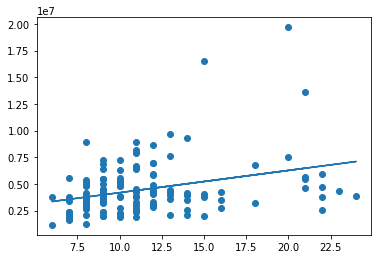

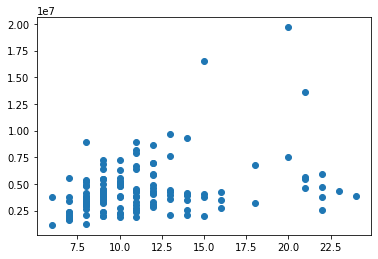

In [42]:
import matplotlib.pyplot as plt
from scipy import stats
x = train['Age']
y = train['revenue']
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
plt.scatter(train['Age'], train['revenue'])
plt.show()

In [43]:
train.dtypes

CityGroup     object
Type          object
P1             int64
P2           float64
P3           float64
P4           float64
P5             int64
P6             int64
P7             int64
P8             int64
P9             int64
P10            int64
P11            int64
P12            int64
P13          float64
P14            int64
P15            int64
P16            int64
P17            int64
P18            int64
P19            int64
P20            int64
P21            int64
P22            int64
P23            int64
P24            int64
P25            int64
P26          float64
P27          float64
P28          float64
P29          float64
P30            int64
P31            int64
P32            int64
P33            int64
P34            int64
P35            int64
P36            int64
P37            int64
revenue      float64
Age            int64
dtype: object

Splitting categorical and numeric variables

In [44]:
cat_attr_train = list(train.select_dtypes("object").columns)
num_attr_float_train = list(train.select_dtypes(include=['float64']).columns)
num_float_train = list(['P1', 'P3', 'P4', 'P14', 'P21', 'P22', 'P27', 'P29'])
num_attr_train = list(train.select_dtypes(include=['int64']).columns)

In [45]:
print(num_attr_float_train)
print(num_float_train)

['P2', 'P3', 'P4', 'P13', 'P26', 'P27', 'P28', 'P29', 'revenue']
['P1', 'P3', 'P4', 'P14', 'P21', 'P22', 'P27', 'P29']


In [46]:
cat_attr_test = list(test.select_dtypes("object").columns)
num_attr_float_test = list(test.select_dtypes(include=['float64']).columns)
num_float_test = list(['P1', 'P3', 'P4', 'P14', 'P21', 'P22', 'P27', 'P29'])
num_attr_test = list(test.select_dtypes(include=['int64']).columns)

In [47]:
num_attr_float_test

['P2', 'P3', 'P4', 'P13', 'P26', 'P27', 'P28', 'P29']

In [48]:
for col in cat_attr_train:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [49]:
cat_attr_train

['CityGroup', 'Type']

In [50]:
cat_attr_test

['CityGroup', 'Type']

In [33]:
train.isnull().sum()

Open Date     0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
Age           0
dtype: int64

In [34]:
test.isnull().sum()

Open Date     0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
Age           0
dtype: int64

Standardising Numeric Variables & Dummification of categorical Variables  

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
scaler = StandardScaler()
train_num = pd.DataFrame(scaler.fit_transform(train[num_attr_train]),columns = num_attr_train)
train_num_float = pd.DataFrame(scaler.fit_transform(train[num_attr_float_train]),columns = num_attr_float_train)
test_num = pd.DataFrame(scaler.fit_transform(test[num_attr_test]),columns = num_attr_test)
test_float = pd.DataFrame(scaler.fit_transform(test[num_float_test]),columns = num_float_test)

In [36]:
cat_attr_train

['Open Date', 'City Group', 'Type']

In [37]:
cat_attr_test

['Open Date', 'City Group', 'Type']

In [38]:
test.columns

Index(['Open Date', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'Age'],
      dtype='object')

In [52]:
#ohe = OneHotEncoder() 
train_cat = pd.get_dummies(train[cat_attr_train], columns=cat_attr_train, drop_first=True)
test_cat = pd.get_dummies(test[cat_attr_test], columns=cat_attr_test, drop_first=True)

In [40]:
print(train.shape)
print(test.shape)

(137, 42)
(100000, 41)


In [53]:
train_1 = pd.concat([train_num,train_num_float,train_cat],axis = 1)
test = pd.concat([test_num,test_float,test_cat],axis = 1)

In [54]:
from sklearn.model_selection import train_test_split
y = train['revenue']
x= train_1.drop(['revenue'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20,random_state=123)

In [55]:
X_train.columns

Index(['P1', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'Age', 'P2',
       'P3', 'P4', 'P13', 'P26', 'P27', 'P28', 'P29', 'CityGroup_Other',
       'Type_others'],
      dtype='object')

Model - 1: Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
train_pred = lin_reg.predict(X_train)
val_pred = lin_reg.predict(X_test)
test_pred = lin_reg.predict(test)

In [59]:
r_sq = lin_reg.score(X_train,y_train)
print('coefficient of determination:', r_sq)
from sklearn.metrics import mean_squared_error
print("Train Rmse for lin_reg :",np.sqrt(mean_squared_error(y_train, train_pred)))
print("Validation Rmse for lin_reg :",np.sqrt(mean_squared_error(y_test, val_pred)))

coefficient of determination: 0.39269143008741314
Train Rmse for lin_reg : 1714935.757579269
Validation Rmse for lin_reg : 3576493.4580833334


In [60]:
test_pred
pd.DataFrame(test_pred).to_csv("lin_reg.csv",index=True)

In [144]:
lin_reg.coef_

array([ 1165042.67978701,  -191245.7273301 ,   484509.24095905,
         285800.51176401, -2566996.90422243,   802487.63384421,
        1251137.1429935 ,  -536702.90815306,   270684.51094585,
       -1461111.89988474,   566533.38497551, -2478777.15341544,
         732198.34176812,  1934069.55928737,  -410174.17953407,
       -1937185.91944834,    88160.50037786,  -172483.15371805,
         868283.74146465,  1746832.86394895,  1180325.91502999,
        1048466.35077066,  -380963.87604347,  -130051.72775219,
         -94245.11882347,  1043488.83082171, -1008199.64160586,
         655402.04500857,    10522.61551712,   643451.78428521,
         169097.70088223,  -223729.08756036,    32843.93904868,
        -824705.23525254, -3935346.32556873,   673462.24241171,
        1252403.53994313,   -10750.57194527])

In [145]:
X_train.shape

(109, 38)

Model - 2: Lasso

In [65]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
Lasso(alpha=0.1)
#print(clf.coef_)
#print(clf.intercept_)
train_pred_ls = lasso.predict(X_train)
val_pred_ls = lasso.predict(X_test)
test_pred_ls = lasso.predict(test)
print("Trian RMSE for lasso : ",np.sqrt(mean_squared_error(y_train, train_pred_ls)))
print("validation RMSE for lasso : ",np.sqrt(mean_squared_error(y_test, val_pred_ls)))

Trian RMSE for lasso :  1714982.1502714134
validation RMSE for lasso :  3582841.17566285


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160263256009487.12, tolerance: 52785276384.64829
  positive)


Model - 3: Elastic Net

In [66]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)
print(ENreg.coef_)
train_pred_en = ENreg.predict(X_train)
val_pred_en = ENreg.predict(X_test)
test_pred_en = ENreg.predict(test)

[  13150.26955075 -115530.98446523  142667.96969001  100715.79181385
 -176518.05894223  -12038.22980207  -11473.75025571    3642.9402285
   -8980.41407216  -62149.04920403  -56708.72372983  -47575.58736535
   42709.87858133   48212.27692483     529.58482342 -234761.92030255
  123118.57667812  -11014.07443374  161544.72827799   49232.77982764
   26490.61322564  -61470.43555136  -54009.99444569  -81107.41910362
    -462.63115719 -111952.39155418    5582.7404682   -65139.11570268
   48082.80447298  348322.0437836   214921.04578917  -62901.75554608
   45879.69615075  -13357.69089958  -63715.29906577   98192.18945177
  206132.44135092  -21273.53065042 -218782.4246115  -144301.89270584]


In [67]:
print(np.sqrt(mean_squared_error(y_train, train_pred_en)))
print(np.sqrt(mean_squared_error(y_test, val_pred_en)))


1963531.9435555441
3421357.1258818624


In [68]:
test_pred_en
pd.DataFrame(test_pred_en).to_csv("rr_en.csv",index=True)

###### Data Engineering - PCA 

In [69]:
#pca
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(X_train)
#print(pca.components_)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
pca_samples = pca.transform(X_train)
X_train = pd.DataFrame(pca_samples)
pca_samples = pca.transform(X_test)
X_test = pd.DataFrame(pca_samples)
pca_samples = pca.transform(test)
test = pd.DataFrame(pca_samples)
print(X_train.head(2))
print(X_test.head(2))
print(test.head(2))

print(X_train.shape)
print(X_test.shape)
print(test.shape)

           0         1         2         3         4         5         6  \
0  11.284331  0.704598 -1.097305 -0.020527 -0.943208 -0.684250 -2.323657   
1  -3.138228  0.039293 -1.213833 -0.075556 -0.281988 -0.641057  0.286218   

          7  
0 -1.154648  
1  0.408788  
          0         1         2         3         4         5         6  \
0  2.391483 -3.707549  3.241957  0.180037  0.931876  1.938129  0.943209   
1 -1.480177 -3.322656 -2.076974 -0.100544 -1.265484 -0.091326  1.517000   

          7  
0  0.315935  
1 -0.619878  
          0         1         2         3         4         5         6  \
0 -2.668194 -0.078296  0.130379  1.095545 -0.909295  0.845349 -0.659032   
1 -2.787182 -0.244393  0.183294  0.458565 -0.163434 -0.370102 -0.167268   

          7  
0  0.649739  
1  0.120261  
(109, 8)
(28, 8)
(100000, 8)


###### Model - 4: Lin Regression with PCA 

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg_pca = LinearRegression()
model = lin_reg_pca.fit(X_train,y_train)
train_pred_pca = lin_reg_pca.predict(X_train)
val_pred_pca = lin_reg_pca.predict(X_test)
test_pred_pca = lin_reg_pca.predict(test)

In [71]:
from sklearn.metrics import mean_squared_error
print("Train Rmse for linear reg with pca : ",np.sqrt(mean_squared_error(y_train, train_pred)))
print("Train Rmse for linear reg with pca : ",np.sqrt(mean_squared_error(y_test, val_pred)))

Train Rmse for linear reg with pca :  1714935.757579269
Train Rmse for linear reg with pca :  3576493.4580833334


In [72]:
test_pred
pd.DataFrame(test_pred).to_csv("lin_pca.csv",index=True)

###### Model - 5 : Gradient Boosting 

In [73]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gb= ensemble.GradientBoostingRegressor(**params)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
train_pred_gb = gb.predict(X_train)
val_pred_gb = gb.predict(X_test)
test_pred_gb = gb.predict(test)

In [75]:
print("Train RMSE for gradient boosting: ",np.sqrt(mean_squared_error(y_train, train_pred_gb)))
print("validation RMSE for gradient boosting: ",np.sqrt(mean_squared_error(y_test, val_pred_gb)))
test_pred
pd.DataFrame(test_pred).to_csv("gradient_boosting.csv",index=True)

Train RMSE for gradient boosting:  332827.99326026207
validation RMSE for gradient boosting:  3263642.355799688


###### Model - 6: XG Boost with grid search 

In [76]:
from sklearn.model_selection import GridSearchCV
#xgb1 = XGBRegressor()

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "loss":['ls'],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt",'auto'],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100]
    }
clf.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
best_param = {'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 0.5}
best_param

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 0.5}

In [79]:
#best_param = clf.best_params_
gb_best= ensemble.GradientBoostingRegressor(**best_param)
gb_best.fit(X_train, y_train)
train_pred_gb_best = gb_best.predict(X_train)
val_pred_gb_best = gb_best.predict(X_test)
test_pred_best = gb_best.predict(test)
print("Train Rmse for gradient boosting with best params",np.sqrt(mean_squared_error(y_train, train_pred_gb_best)))

print("validation Rmse for gradient boosting with best params",np.sqrt(mean_squared_error(y_test, val_pred_gb_best)))

Train Rmse for gradient boosting with best params 1939843.8304043924
validation Rmse for gradient boosting with best params 3531542.323675946


In [80]:
pd.DataFrame(test_pred_best).to_csv("gradient_boosting_best.csv",index=True)

###### Model - 7: Random Forest Reg

In [81]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
train_pred_rf = rf.predict(X_train)
val_pred_rf = rf.predict(X_test)
test_pred_rf = rf.predict(test)
print("Train Rmse for Random Forest : ",np.sqrt(mean_squared_error(y_train, train_pred_rf)))
print("Validation Rmse for Random Forest : ",np.sqrt(mean_squared_error(y_test, val_pred_rf)))

Train Rmse for Random Forest :  1701113.0932045518
Validation Rmse for Random Forest :  3496536.761223537


In [82]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}
clf = GridSearchCV(rf, tuned_parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train,y_train)
best = clf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished


In [83]:
rf_best = RandomForestRegressor(**best)
rf_best.fit(X_train, y_train)
train_pred_rf_best = rf_best.predict(X_train)
val_pred_rf_best = rf_best.predict(X_test)
test_pred_rf_best = rf_best.predict(test)
print("Train Rmse for Random Forest with best params ",np.sqrt(mean_squared_error(y_train, train_pred_rf_best)))
print("Validation Rmse for Random Forest with best params ",np.sqrt(mean_squared_error(y_test, val_pred_rf_best)))

Train Rmse for Random Forest with best params  1527629.408670262
Validation Rmse for Random Forest with best params  3450432.8711861153


In [84]:
pd.DataFrame(test_pred_rf_best).to_csv("random_forest_best.csv",index=True)